# # SpringBoard Capstone2: Direct Marketing
## Unit11: Exploring Data
> Data from Kaggle.com: https://www.kaggle.com/c/bankdirectmarketing/data 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [3]:
from dython.nominal import associations
from dython.data_utils import split_hist

In [4]:
market = pd.read_csv('/Users/Ling/Desktop/01_Springboard/DirectMarketing/Data/train.csv', index_col = 0)
print(market.head())

          age           job   marital            education  default housing  \
RecordID                                                                      
13783      49        admin.  divorced  professional.course       no     yes   
23986      52      services   married          high.school  unknown     yes   
20663      46   blue-collar  divorced             basic.9y       no      no   
13958      26  entrepreneur    single          high.school      yes     yes   
28184      47        admin.    single    university.degree       no      no   

         loan   contact month day_of_week  ...  campaign  pdays  previous  \
RecordID                                   ...                              
13783     yes  cellular   aug         mon  ...         1    115         2   
23986      no  cellular   may         mon  ...         1    402         2   
20663      no  cellular   apr         wed  ...         1    999         1   
13958     yes  cellular   aug         fri  ...        28    9

In [5]:
# devide column names into categorical and numerical lists
cat = market[['job', 'marital', 'education', 'default', 'housing', \
 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribe']]
num = market[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', \
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

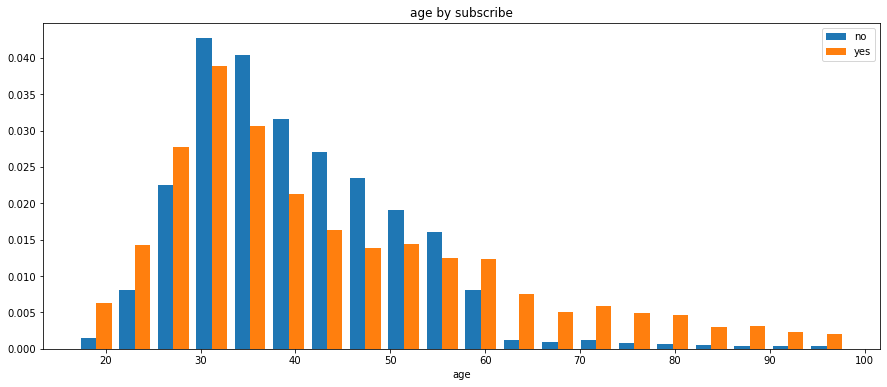

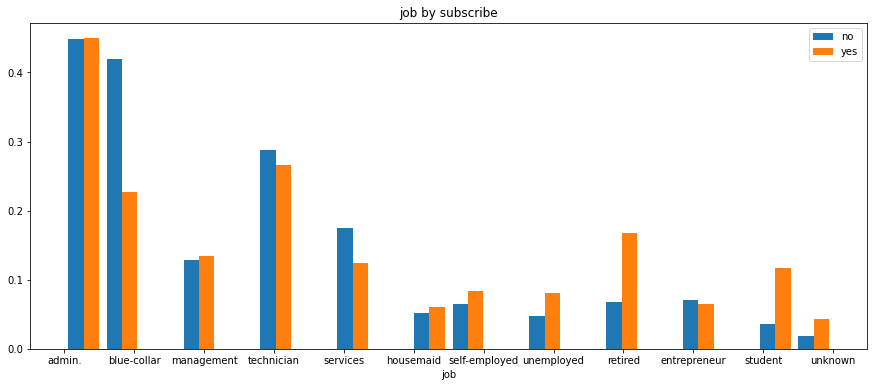

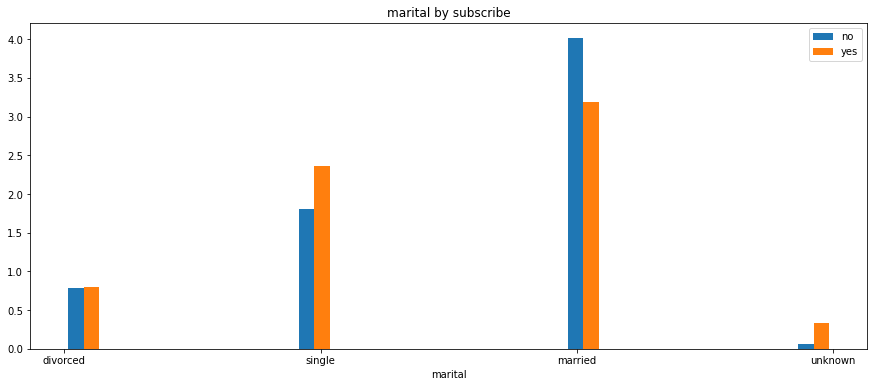

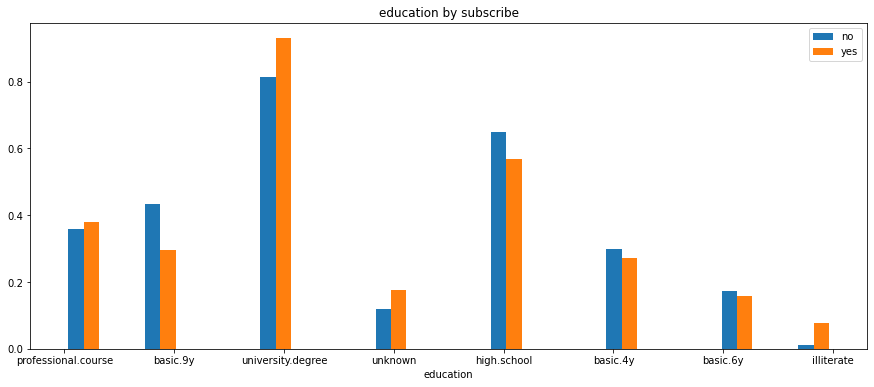

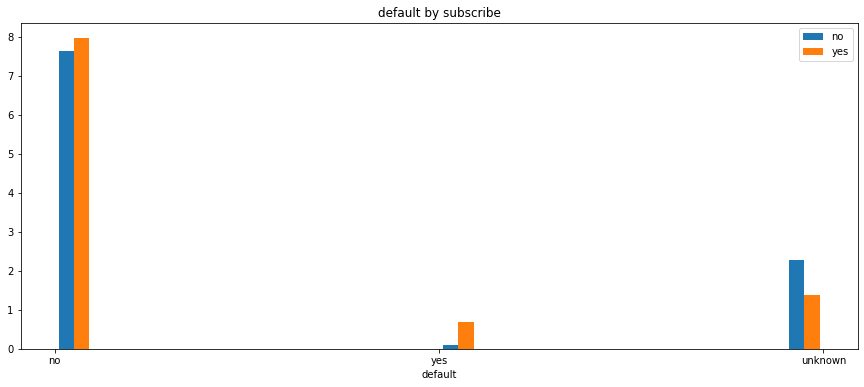

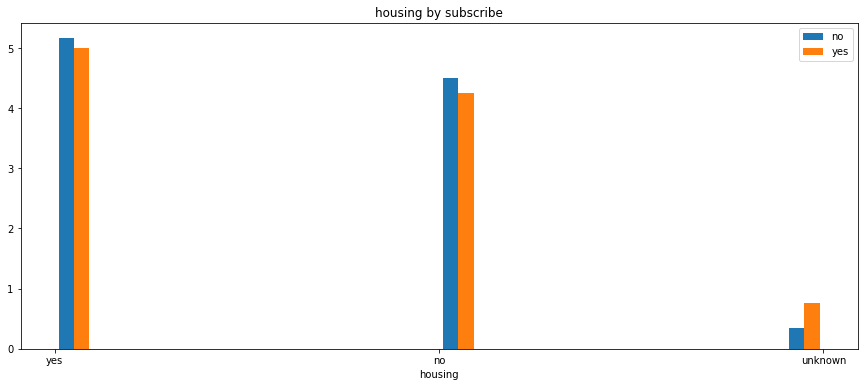

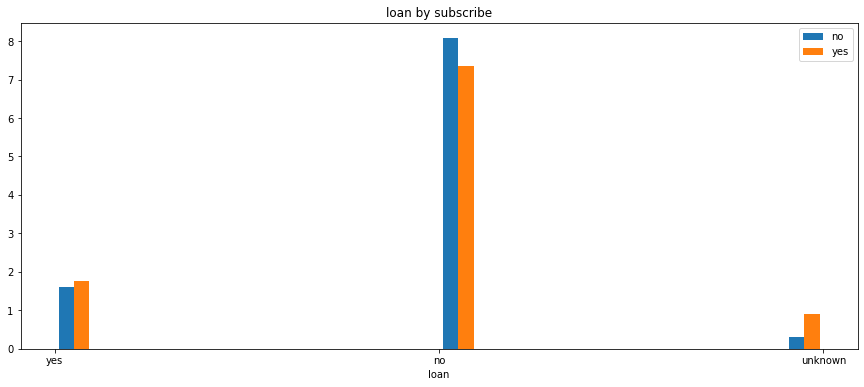

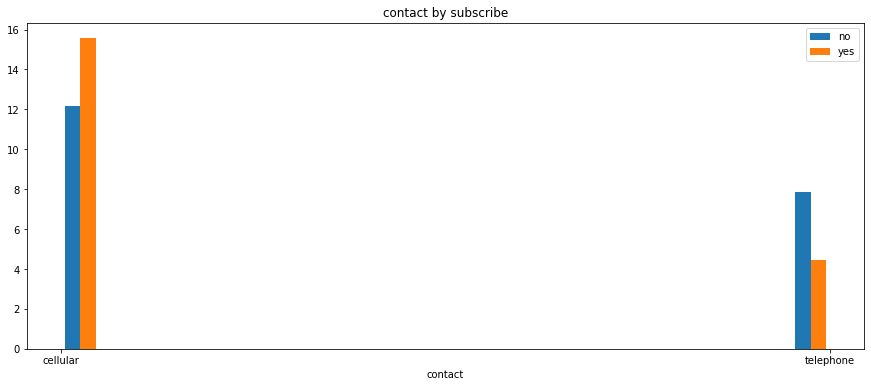

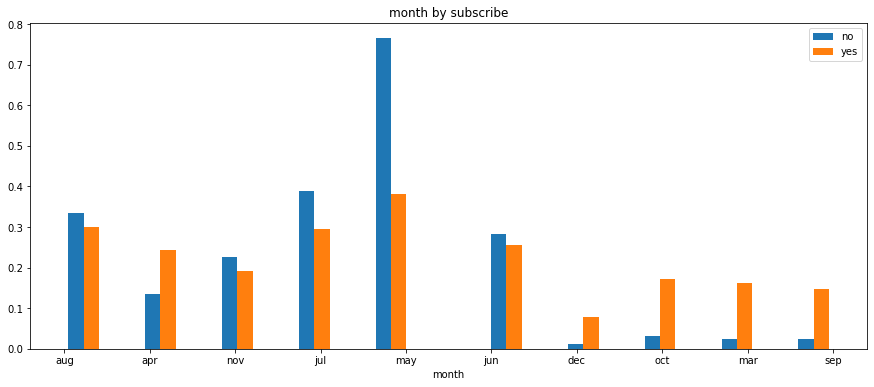

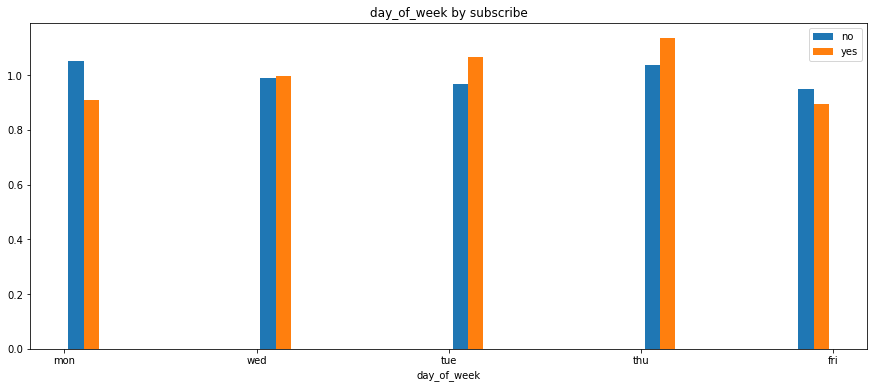

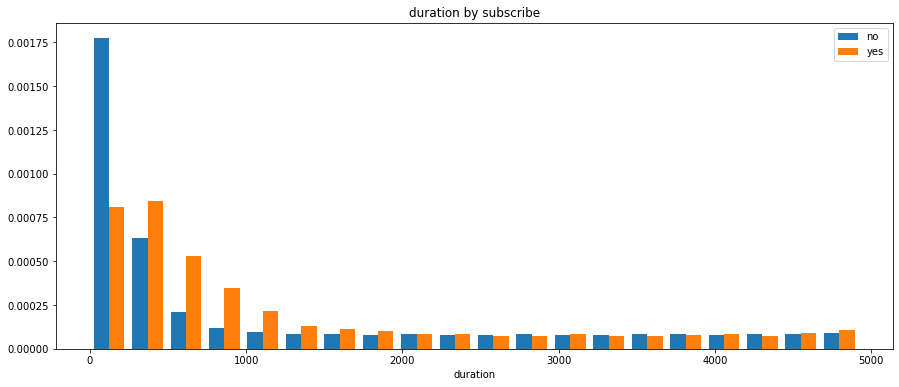

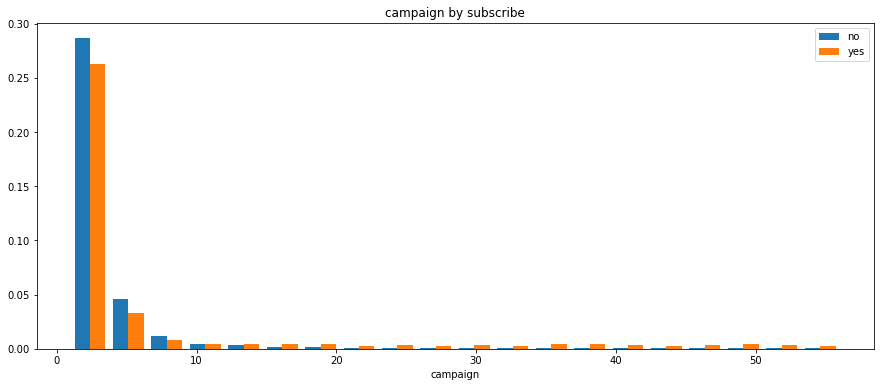

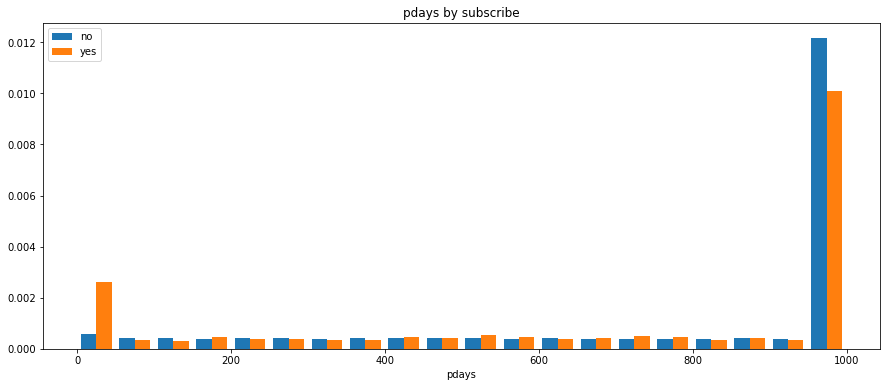

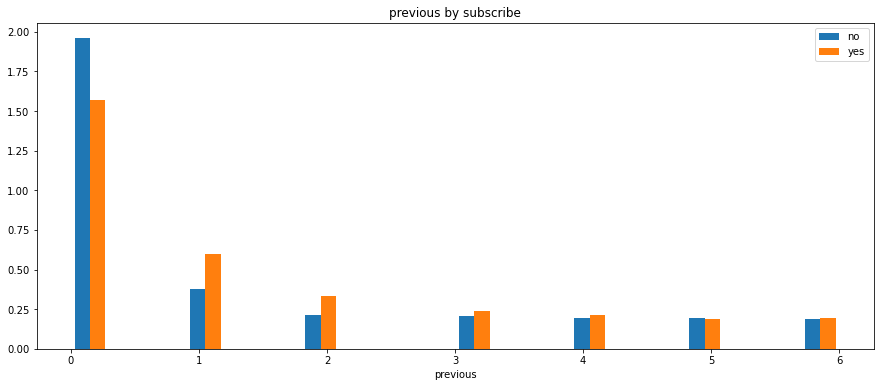

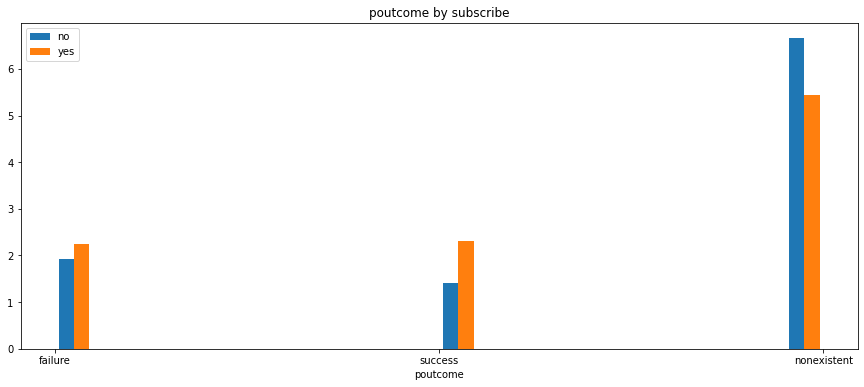

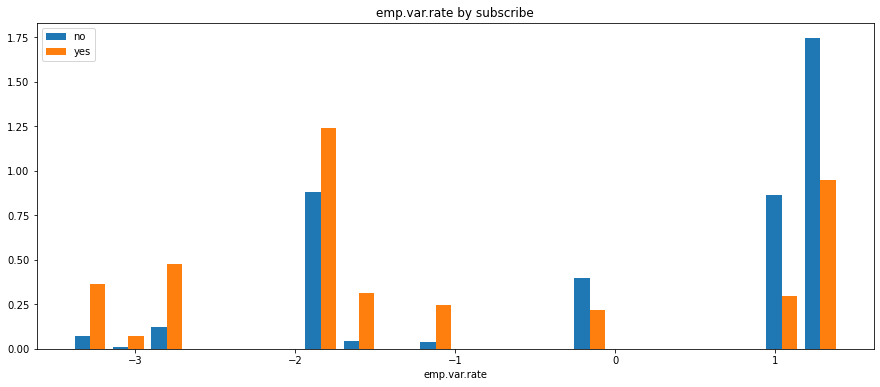

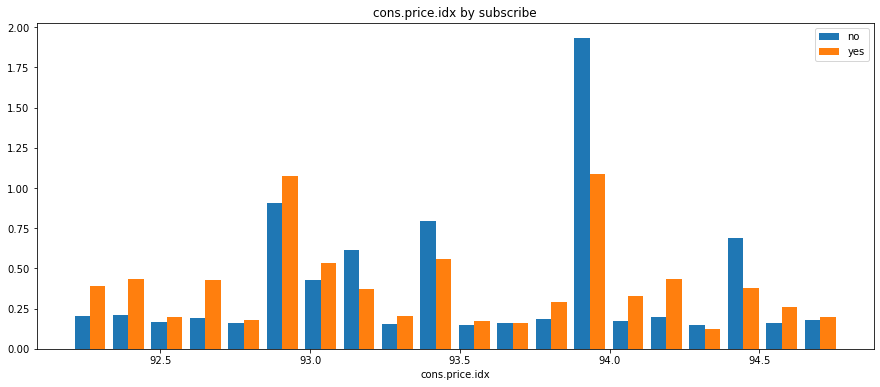

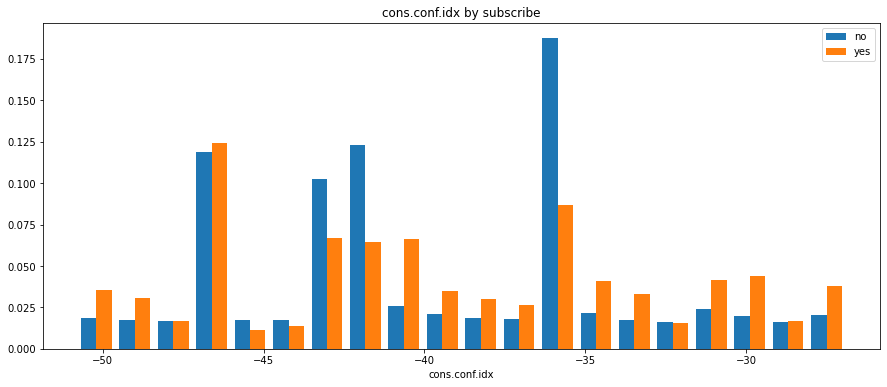

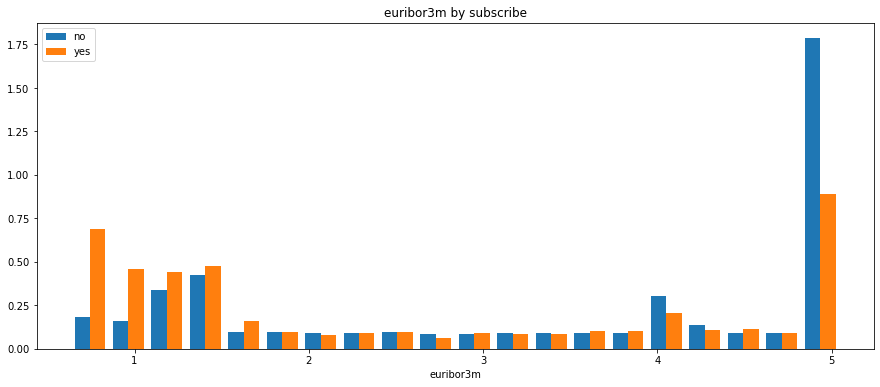

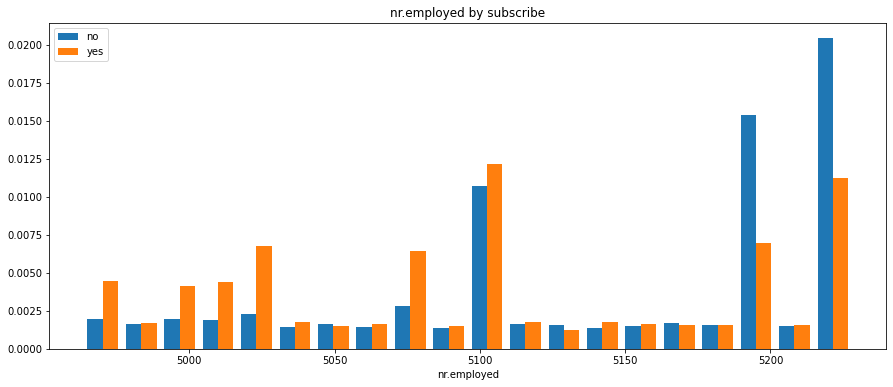

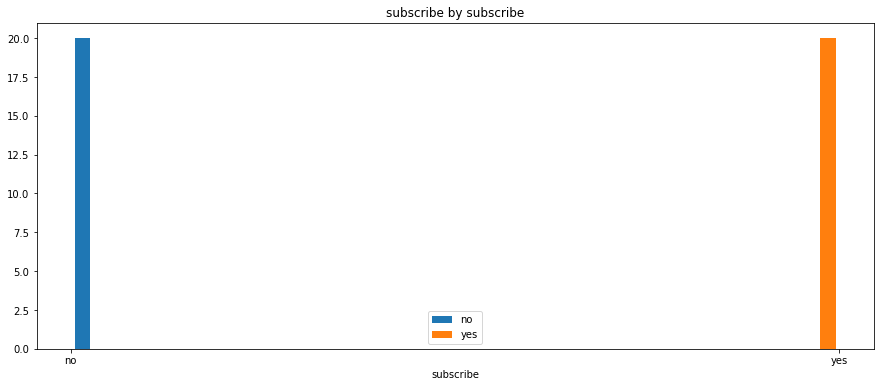

In [6]:
for column in market.columns:
    split_hist(market, column, 'subscribe', density = True, bins=20, figsize=(15,6))

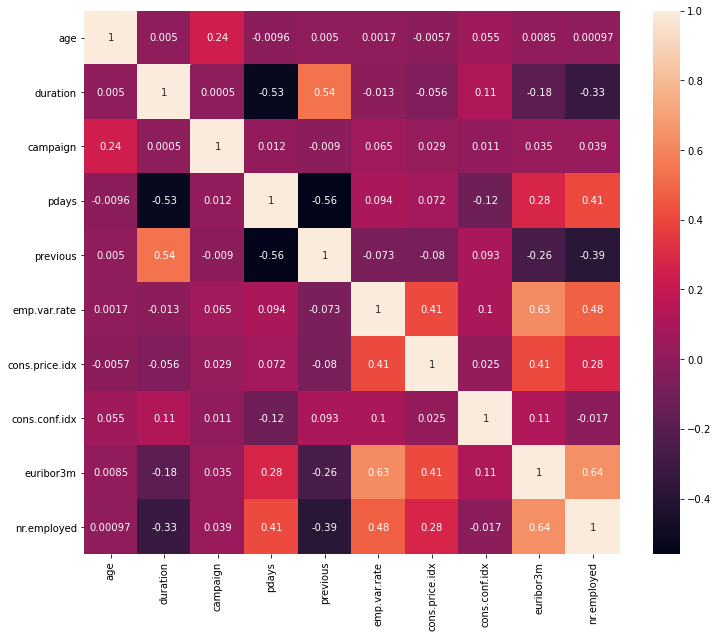

In [7]:
# correlation between numerical columns
plt.subplots(figsize=(12,10))
sns.heatmap(num.corr(), annot = True);

> correlation between several numerical pairs: 
<ul> positive:
<li>'emp.var.rate' and 'euribor3m'</li>
<li>'euribor3m' and 'nr.employed'</li>
<li>'emp.var.rate' and 'nr.employed'</li>   
<li>'duration' and 'previous'</li>
</ul>
'emp.var.rate','euribor3m', and 'nr.employed' are related to each other! <br>
<ul> negative:
<li>'pdays' and 'previous'</li>
<li>'pdays' and 'duration'</li>
</ul>

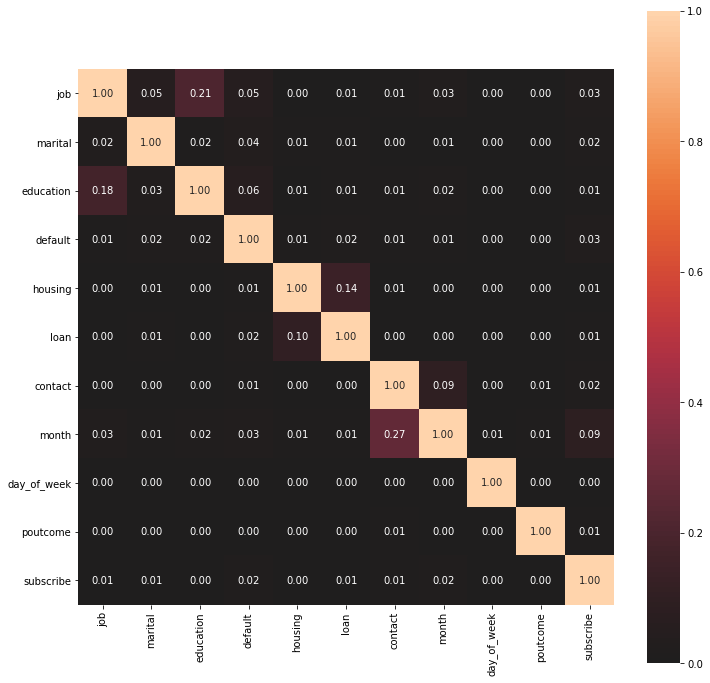

{'corr':                   job   marital  education   default   housing      loan  \
 job          1.000000  0.052649   0.209461  0.049009  0.004741  0.007270   
 marital      0.024480  1.000000   0.015466  0.036686  0.008250  0.014663   
 education    0.179524  0.028509   1.000000  0.061552  0.006760  0.008384   
 default      0.013981  0.022507   0.020487  1.000000  0.010782  0.021162   
 housing      0.001860  0.006960   0.003094  0.014828  1.000000  0.143370   
 loan         0.002074  0.008995   0.002790  0.021160  0.104243  1.000000   
 contact      0.003795  0.002805   0.004741  0.013873  0.004805  0.001244   
 month        0.026179  0.013230   0.019699  0.029944  0.009212  0.009871   
 day_of_week  0.000678  0.000432   0.000798  0.000296  0.000639  0.000581   
 poutcome     0.000669  0.000315   0.000297  0.001764  0.000147  0.000293   
 subscribe    0.005603  0.007449   0.002718  0.016555  0.002707  0.007056   
 
               contact     month  day_of_week  poutcome  subscribe

In [8]:
# correlation between categorical columns
associations(cat, nom_nom_assoc='theil', figsize=(12, 12))

> slightly higher correlation between two categorical pairs only: 'job' and 'education' ; 'month' and 'contact' <br>
> subscribe is not correlated to any categorical variable??

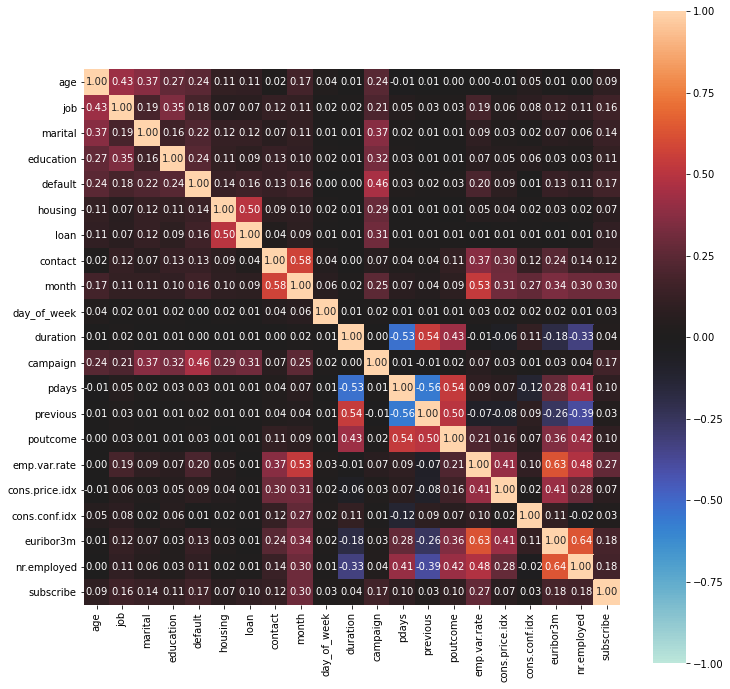

{'corr':                      age       job   marital  education   default   housing  \
 age             1.000000  0.429579  0.369709   0.266379  0.242896  0.113853   
 job             0.429579  1.000000  0.189004   0.347723  0.180702  0.065534   
 marital         0.369709  0.189004  1.000000   0.162388  0.216790  0.118030   
 education       0.266379  0.347723  0.162388   1.000000  0.235508  0.112330   
 default         0.242896  0.180702  0.216790   0.235508  1.000000  0.139168   
 housing         0.113853  0.065534  0.118030   0.112330  0.139168  1.000000   
 loan            0.108861  0.070962  0.123552   0.091158  0.158913  0.500834   
 contact         0.022366  0.124933  0.073180   0.129162  0.130421  0.088924   
 month           0.172287  0.112796  0.114203   0.104446  0.160021  0.096096   
 day_of_week     0.035582  0.015170  0.010160   0.020234  0.002432  0.018829   
 duration        0.005017  0.023286  0.005242   0.013266  0.004369  0.006990   
 campaign        0.239789  0.210

In [9]:
# The correlation of everything:
associations(market, figsize=(12, 12))

> positive (corr >= 0.5): 'housing' and 'loan', 'poutcome' and 'pdays', 'poutcome' and 'previous', 'contact' and 'month', 'month' and 'emp.var.rate', 'duration' and 'previous', 'emp.var.rate' and 'euribor3m', 'euribor3m' and 'nr.employed'

> negative (corr >= 0.5): 'duration' and 'pdays', 'pdays' and 'previous'

> 'month', 'emp.var.rate' seemed to have relatively higher correlation with subscribe


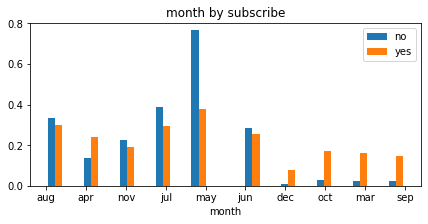

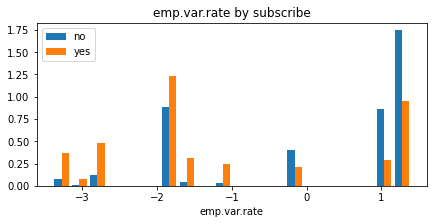

In [10]:
# plote 'subscribe' with 'month', 'emp.var.rate' 
for column in ['month', 'emp.var.rate']:
     split_hist(market, column, 'subscribe', density = True,bins=20, figsize=(7,3))

### categorical relationships
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

### categorical -- numerical relationships
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365